In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"  # specify which GPU(s) to be used

In [1]:
from src.model import BaseNetwork

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

In [3]:
data = open("data/movie_lines.txt", "rb").read()[:1500].decode("utf-8")

In [4]:
model = BaseNetwork(max_sequence_len=301, batchsize=32, vocab_size=1000)

In [5]:
%%time
corpus = model.etl(data)

There are a total of 6 training samples
There are a total of 2 validation samples
CPU times: user 29.4 ms, sys: 293 µs, total: 29.7 ms
Wall time: 28.6 ms


### No LSTM net

In [ ]:
%%time
model.compile(arch="Baseline", embedding="", gpu=True)
model.fit(corpus, epochs=100, verbose=1)

### LSTM Normal Embedding

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 24, 64)            9536      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 149)               9685      
Total params: 44,053
Trainable params: 44,053
Non-trainable params: 0
_________________________________________________________________
None
The model will be saved with the name: Best_model_19:13:58.589203
The fit process is starting!
Epoch 1/100
6/6 [==============================] - 3s 531ms/step - loss: 5.0028 - perplexity_raw: 1.0000 - val_loss: 5.0036 - val_perplexity_raw: 1.0000
Epoch 2/100
6/6 [==============================] - 0s 69ms/step - loss: 4.9863 - perplexity_raw: 1.0000 - val_loss: 5.0058 - val_perplexity_raw: 1.00

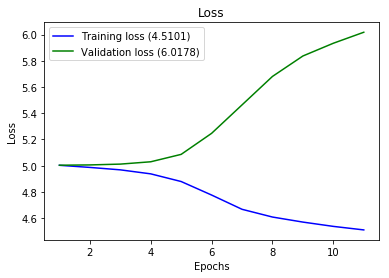

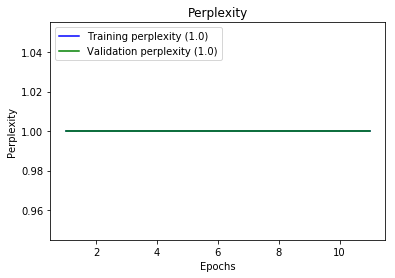

CPU times: user 13.6 s, sys: 5.83 s, total: 19.4 s
Wall time: 10.2 s


In [6]:
%%time
model.compile(arch="LSTM_Embedding", embedding="", gpu=False, lstm=[32])
model.fit(corpus, epochs=100, verbose=1)

### LSTM fastText Embedding

Embedding file loaded sucessfully!


/home/guillem/TFG/src/model.py:432: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  all_embs = np.stack(embeddings.values())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 24, 300)           44700     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                85248     
_________________________________________________________________
dense_1 (Dense)              (None, 149)               9685      
Total params: 139,633
Trainable params: 94,933
Non-trainable params: 44,700
_________________________________________________________________
None
The model will be saved with the name: Best_model_19:15:32.646533
The fit process is starting!
Epoch 1/100
6/6 [==============================] - 3s 503ms/step - loss: 5.0084 - perplexity_raw: 1.0000 - val_loss: 5.0095 - val_perplexity_raw: 1.0000
Epoch 2/100
6/6 [==============================] - 0s 76ms/step - loss: 4.8998 - perplexity_raw: 1.0000 - val_loss: 5.0590 - val_perplexity_raw

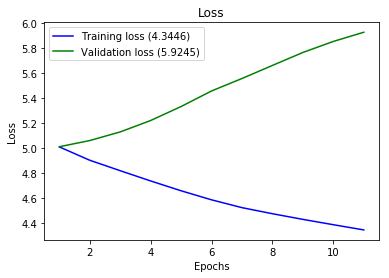

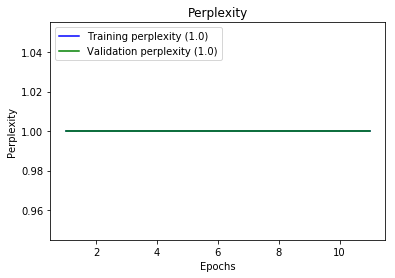

CPU times: user 40.6 s, sys: 8 s, total: 48.6 s
Wall time: 43.7 s


In [6]:
%%time
model.compile(arch="LSTM_Embedding", embedding="fastText", gpu=False, lstm=[32])
model.fit(corpus, epochs=100, verbose=1)

In [8]:
a = BaseNetwork.load_model("Best_model_19:15:32.646533")

In [9]:
a.generate_text("Good morning", 5)

111
127
33
76
117


'Good morning believe is on coiffure looks'

In [10]:
model.generate_text("Good morning", 5)

4
20
3
4
20


'Good morning to she you to she'

In [ ]:
model.generate_text("Bianca is coming xD", 200)

In [ ]:
model.generate_text("Good morning", 5)

In [ ]:
model.generate_text("John, I'm only dancin'!", 5)

In [ ]:
model.generate_text("hey you", 10)

In [ ]:
model.generate_text("I don't know", 10)

In [ ]:
model.generate_text("Wait", 10)

In [ ]:
model.generate_text("Hasta la vista", 20)

In [ ]:
model.generate_text("Baby", 20)

In [ ]:
model.generate_text("Brother", 20)

In [ ]:
model.generate_text("Bro", 20)

In [ ]:
model.generate_text("I will not go to prison", 20)

Dudas:
- Perplexity usando: https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits Me afecta el warning?
- Epocas, batchsize, neuronas y capas, tamaño embedding (si usas fasttext est ultimo da iwa). max_sequence_len vocab_size??